### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso

In [43]:
df = pd.read_csv('data/non_linear.csv')
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [44]:
def generate_degrees(source_data, degree: int):
    source_data = pd.DataFrame(source_data)
    new_data = pd.DataFrame()

    cols = source_data.columns

    for n in range(1, degree + 1):
      new_cols = [f'{name}^{n}' for name in cols]
      new_data[new_cols] = source_data.copy()**n

    return new_data

In [45]:
degree = 8
X = generate_degrees(df[['x_train']], degree=degree)
y = df[['y_train']]

X.head()

,x_train^1,x_train^2,x_train^3,x_train^4,x_train^5,x_train^6,x_train^7,x_train^8
0,0.138368,0.019146,0.002649,0.000367,0.000051,0.000007,9.710899e-07,1.343682e-07
1,0.157237,0.024723,0.003887,0.000611,0.000096,0.000015,2.376188e-06,3.736243e-07
2,0.188684,0.035602,0.006717,0.001267,0.000239,0.000045,8.514310e-06,1.606516e-06
3,0.685553,0.469983,0.322198,0.220884,0.151427,0.103811,7.116823e-02,4.878957e-02
4,0.874237,0.764290,0.668171,0.584140,0.510677,0.446452,3.903051e-01,3.412192e-01


In [46]:
ridge_model = Ridge(alpha=0.8).fit(X, y)

In [47]:
lasso_model = Lasso(alpha=0.8).fit(X, y)

/home/baika/___project/python/Machine_learning_classical_algorithms_Sem4/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.335e+00, tolerance: 3.191e-03
  model = cd_fast.enet_coordinate_descent(


In [48]:
ridge_model.coef_, lasso_model.coef_

(array([[ 5.05133950e-01,  3.50113358e-01, -1.03076702e-04,
         -2.30029369e-01,  6.99603893e-02, -6.86910289e-04,
         -1.76964209e-03,  1.58301479e-04]]),
 array([-0.00000000e+00, -0.00000000e+00, -1.23662052e-02, -8.77130342e-03,
         9.34034433e-04,  1.71519415e-04,  3.88621101e-06, -1.73045762e-06]))

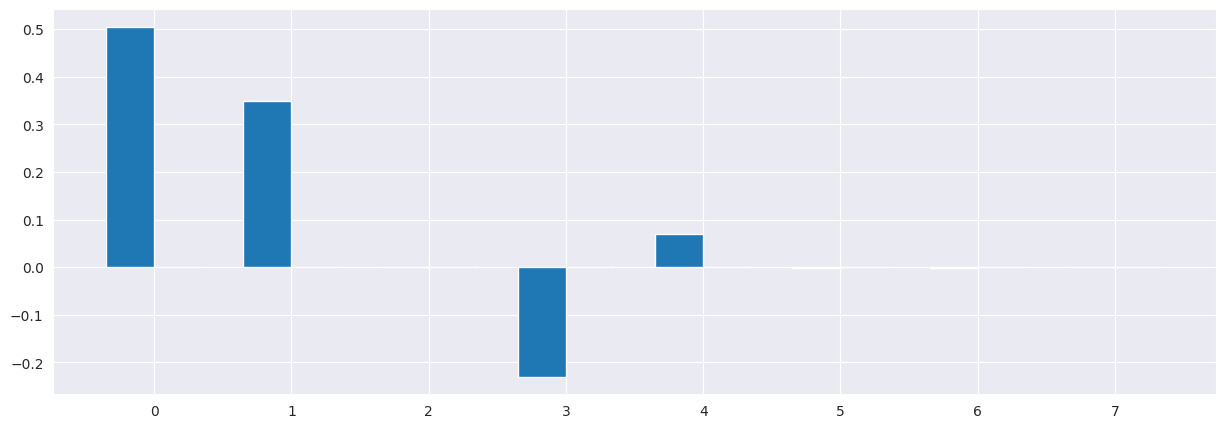

In [49]:
data = {
  'Ridge': ridge_model.coef_.tolist()[0],
  'Lasso': lasso_model.coef_.tolist()[0]
}

ind = np.arange(degree)
width = 0.35

fig, ax = plt.subplots(figsize=(15,5))

for n, (label, values) in enumerate(data.items()):
  ax.bar(ind+width*n, values, width)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(range(degree))
plt.show()

*Коэффициенты модели Lasso слишком малы по сравнению с моделью Ridge*

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!